- Albert Molano   - 201713848
- Luisa Rodríguez - 201716897
- Nicolas Segura  - 201716989

## 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1554]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(seed)


# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix , ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 



## 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [1555]:
# Se cargan los datos. 
diagnostics=pd.read_csv('datos/SaludAlpes_diagnosticos_dataset.csv', sep=';', encoding = 'utf-8')

In [1556]:
# Cantidad de datos y número de variables
diagnostics.shape

(765, 11)

In [1557]:
# Mostrar los datos
diagnostics.head()

,Hair_color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [1558]:
# Podemos ver los tipos de todas la variables.
diagnostics.dtypes

Hair_color                  object
Pregnancies                  int64
Glucose                      int64
City                        object
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                          int64
DiabetesPedigreeFunction     int64
Age                          int64
Outcome                      int64
dtype: object

In [1559]:
# Y hacer una descripción de los datos
diagnostics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.847059,120.975163,69.117647,20.581699,79.998693,289.675817,432.903268,33.261438,0.350327
std,3.369696,32.008477,19.387122,15.947154,115.397373,116.911406,336.427137,11.762356,0.477384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,252.000000,206.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,338.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.000000,359.000000,593.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


In [1560]:

# Se observa que hay ausencias, en particular en la variable "Insulin". Veamos cuantas, para todas las variables:
diagnostics[(diagnostics==0)].count()

Hair_color                    0
Pregnancies                 111
Glucose                       5
City                          0
BloodPressure                35
SkinThickness               225
Insulin                     372
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     497
dtype: int64

## 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [1561]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
diagnostics_t = diagnostics.copy()
# Primero eliminaremos aquellas variables con muchas ausencias.
diagnostics_t = diagnostics_t.drop(['Hair_color', 'City'], axis=1)

In [1562]:
# Eliminación registros con ausencias
indices = diagnostics_t[(diagnostics_t['Insulin'] == 0) | (diagnostics_t['BMI'] == 0) | (diagnostics_t['Glucose'] == 0) | (diagnostics_t['SkinThickness'] == 0) ].index
diagnostics_t.drop(indices, inplace=True)


In [1563]:
#Haceuna descripción de los datos
diagnostics_t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,3.306905,122.695652,70.680307,29.150895,156.232737,307.956522,481.153453,30.890026,0.332481
std,3.213422,30.870814,12.507540,10.529336,118.942432,105.992238,340.667658,10.201593,0.471706
min,0.000000,56.000000,24.000000,7.000000,14.000000,24.000000,4.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.500000,262.500000,245.500000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,126.000000,328.000000,422.000000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,368.500000,669.500000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


In [1564]:
# Cantidad de datos y número de variables
diagnostics_t.shape

(391, 9)

In [1565]:
diagnostics_t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,3.306905,122.695652,70.680307,29.150895,156.232737,307.956522,481.153453,30.890026,0.332481
std,3.213422,30.870814,12.507540,10.529336,118.942432,105.992238,340.667658,10.201593,0.471706
min,0.000000,56.000000,24.000000,7.000000,14.000000,24.000000,4.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.500000,262.500000,245.500000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,126.000000,328.000000,422.000000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,368.500000,669.500000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


In [1566]:
# Cantidad de datos y número de variables
diagnostics_t.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1
6,3,78,50,32,88,31,248,26,1
8,2,197,70,45,543,305,158,53,1
13,1,189,60,23,846,301,398,59,1


In [1567]:
# Podemos ver los estadísticos de la variable "popularity"
pd.value_counts(diagnostics_t['Outcome'])

0    261
1    130
Name: Outcome, dtype: int64

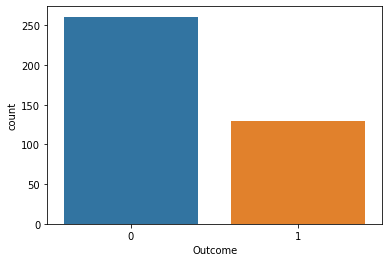

In [1568]:
ax = sns.countplot(x='Outcome', data=diagnostics_t)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [1569]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = diagnostics_t.dtypes[(diagnostics_t.dtypes == np.int64) | (diagnostics_t.dtypes == np.float64)].index 
number_cols = diagnostics_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1570]:
diagnostics_m = diagnostics_t[number_cols]

In [1571]:
# Podemos ver como quedaron los datos
diagnostics_m.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1
6,3,78,50,32,88,31,248,26,1
8,2,197,70,45,543,305,158,53,1
13,1,189,60,23,846,301,398,59,1


In [1572]:
# Revisión del total de registros
diagnostics_m.shape

(391, 9)

## 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [1573]:
scaler = StandardScaler()
normalized_diag = scaler.fit_transform(diagnostics_m)
normalized_diag = pd.DataFrame(data=diagnostics_m,columns=diagnostics_m.columns)


In [1574]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = normalized_diag['Outcome']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = normalized_diag.drop(['Outcome'], axis=1)

In [1575]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

#### 4.1  KNN: Nicolas Segura

In [1576]:
particiones_knn=KFold(n_splits=10,shuffle=True,random_state=seed)
param_grid_knn = {'n_neighbors': [2,3,5,7,9,11],'metric': ['minkowski','euclidean','manhattan'], 'p': [1,2]}

In [1577]:
neigh = KNeighborsClassifier()
mejor_modelok = GridSearchCV(neigh, param_grid_knn, cv=particiones_knn)
mejor_modelok.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=161, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 9, 11], 'p': [1, 2]})

In [1578]:
mejor_modelok.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}

In [1579]:
neigh_f = mejor_modelok.best_estimator_

In [1580]:
y_pred = neigh_f.predict(X_test)

In [1581]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[35, 17],
       [10, 17]], dtype=int64)

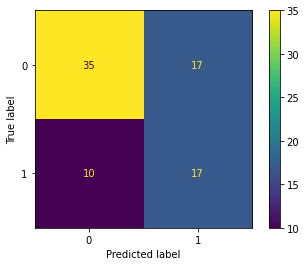

In [1582]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh_f, X_test, Y_test)  
plt.show()

In [1583]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        52
           1       0.50      0.63      0.56        27

    accuracy                           0.66        79
   macro avg       0.64      0.65      0.64        79
weighted avg       0.68      0.66      0.67        79



### 4.2 Árbol de decisión: Mariana Rodriguez

In [1584]:
particiones_t = KFold(n_splits=10, shuffle=True, random_state=seed)
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [4,6,8,10,20], 'min_samples_split': [2,3,5,10,15]}

In [1585]:
tree = DecisionTreeClassifier(random_state=seed)
mejor_modelo = GridSearchCV(tree, param_grid, cv=particiones_t)
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=161, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=161),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 5, 10, 15]})

In [1586]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5}

In [1587]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
f_tree=mejor_modelo.best_estimator_

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [1588]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = f_tree.predict(X_test)

In [1589]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[46,  6],
       [11, 16]], dtype=int64)

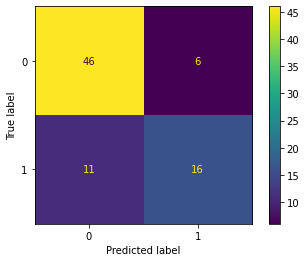

In [1590]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(f_tree, X_test, Y_test)  
plt.show()  

In [1591]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.78
Recall: 0.5925925925925926
Precisión: 0.7272727272727273
Puntuación F1: 0.6530612244897959


Para tener una panorama completo podemos generar un reporte.

In [1592]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.73      0.59      0.65        27

    accuracy                           0.78        79
   macro avg       0.77      0.74      0.75        79
weighted avg       0.78      0.78      0.78        79



### 4.3 Regresion Lineal: Albert Molano

In [1593]:
LinearModel = LinearRegression().fit(X_train, Y_train)
list(zip(X_train, LinearModel.coef_))

[('Pregnancies', 0.01465415812674797),
 ('Glucose', 0.005837548337767924),
 ('BloodPressure', 0.00010166786453881266),
 ('SkinThickness', 0.007015097914197059),
 ('Insulin', 9.259670864055543e-05),
 ('BMI', 0.00010177581239243774),
 ('DiabetesPedigreeFunction', 0.00010673957341022187),
 ('Age', 0.004202746820281317)]

In [1594]:
#Este método nos permite predecir las etiquetas de los valores de los datos sobre la base del modelo entrenado.
y_prediction_lineal = LinearModel.predict(X_test)
y_prediction_lineal

array([ 0.47163607,  0.13436721,  0.46049605,  0.21443328,  0.15746516,
        0.08479682,  0.28553831,  0.22603994,  0.36215367, -0.05277231,
        0.37242334,  0.11526765,  0.22999887,  0.80423171,  0.60999376,
        0.03824575,  0.79061   ,  0.43311593,  0.30957307,  0.77726928,
        0.39629162,  0.66532921,  0.8980691 , -0.02332922,  0.67847849,
       -0.14530001,  0.72677469,  0.06380456,  0.33982478,  0.2175439 ,
        0.43570589,  0.08804496,  0.18564344,  0.24540642,  0.32754033,
        0.24562888,  0.47879507,  0.31655231, -0.00417499,  0.55729076,
        0.11134705,  0.26007397,  0.47088872,  0.18617586,  0.75672408,
        0.54479379,  0.09943496,  0.57034135,  0.47239633,  0.66027238,
       -0.00769154,  0.59802479,  0.60809103,  0.23097931,  0.5376567 ,
        0.31535472,  0.23309168,  0.73143266,  0.12293031,  0.23611009,
        0.1253356 ,  0.41230013,  0.14822331,  0.10523829,  0.16047314,
        0.43348794,  0.26858238,  0.48236628,  0.60288789, -0.02

In [1595]:
# Replace all values in y_prediction_poly with 0 or 1 if they are above or below 0.5.
y_prediction_lineal[y_prediction_lineal >= 0.5] = 1 
y_prediction_lineal[y_prediction_lineal < 0.5] = 0


In [1596]:
cm = confusion_matrix(Y_test, y_prediction_lineal)
cm

array([[46,  6],
       [11, 16]], dtype=int64)

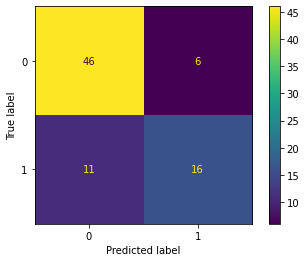

In [1597]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [1598]:
#Se muestra el reporte de clasificación
print(classification_report(Y_test, y_prediction_lineal))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.73      0.59      0.65        27

    accuracy                           0.78        79
   macro avg       0.77      0.74      0.75        79
weighted avg       0.78      0.78      0.78        79

